In [2]:
import atomica as at
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import vimc_functions as vimc
import vimc_plotting as vplt

loc = 'C:/Users/Phil/Google Drive (phillip.luong@burnet.edu.au)/Projects/2022-12 VIMC HepB Modelling/2023-04_Wk1_result_archives'

In [5]:
in_df_v = pd.read_csv(loc+'/input_results_vax_230130_2.csv')
cen_df_v = pd.read_csv(loc+'/central_results_vax_230130.csv')
sto_df_v = pd.read_csv(loc+'/stochastic_results_vax_230130.csv')

In [21]:
df = cen_df_v

In [7]:
cen_df_v

,disease,year,age,country,country_name,cohort_size,cases,dalys,deaths
0,HepB,2000,0,RFP,Request for Proposal,4.788461e+06,63591.399047,3853.751281,69.299642
1,HepB,2001,0,RFP,Request for Proposal,4.942008e+06,65539.111059,3970.525454,71.394088
2,HepB,2002,0,RFP,Request for Proposal,5.086190e+06,67284.998527,4079.905589,73.349536
3,HepB,2003,0,RFP,Request for Proposal,5.218897e+06,68764.728781,4181.091219,75.152453
4,HepB,2004,0,RFP,Request for Proposal,5.339080e+06,70034.244181,4274.182115,76.806950
...,...,...,...,...,...,...,...,...,...
10196,HepB,2096,100,RFP,Request for Proposal,4.668195e+03,0.011990,9.521749,0.968334
10197,HepB,2097,100,RFP,Request for Proposal,4.890543e+03,0.011992,9.715281,0.988930
10198,HepB,2098,100,RFP,Request for Proposal,5.116927e+03,0.011980,9.898359,1.008456
10199,HepB,2099,100,RFP,Request for Proposal,5.373442e+03,0.012014,10.119845,1.031946


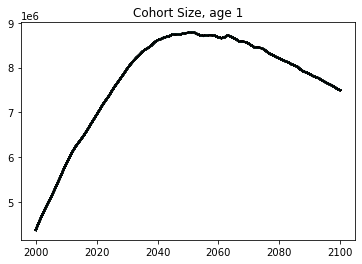

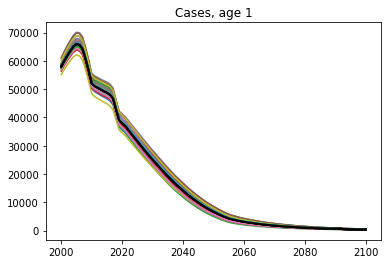

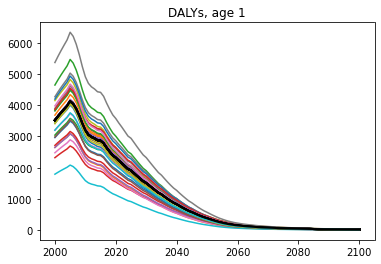

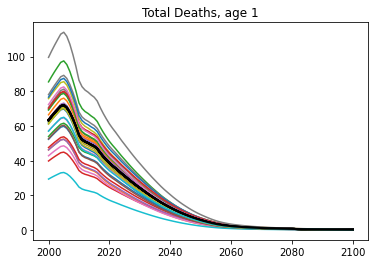

In [6]:
vplt.plot_all(cen_df_v, sto_df_v, 1)

### TODO: create a percentile plot with sto_df_v (based on age/year etc)

In [9]:
age = 2
year = 2024

In [15]:
sto_df_v[(sto_df_v.age == age) & (sto_df_v.year == year)].cases.quantile(0.2)

30495.033754161337

In [14]:
sto_df_v[(sto_df_v.age == age) & (sto_df_v.year == year)].cases.quantile(0.8)

33738.95821977645

In [16]:
lwr = []
hgr = []
for year in range(2000,2101):
    lwr.append(sto_df_v[(sto_df_v.age == age) & (sto_df_v.year == year)].cases.quantile(0.2))
    hgr.append(sto_df_v[(sto_df_v.age == age) & (sto_df_v.year == year)].cases.quantile(0.8))

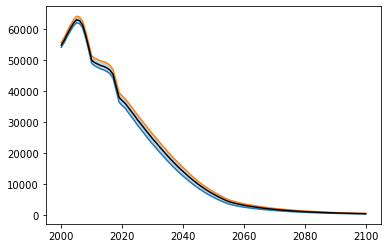

In [30]:
fig, ax = plt.subplots()
plt.plot(list(range(2000,2101)), lwr, label = '20 percentile')
plt.plot(list(range(2000,2101)), hgr, label = '80 percentile')
ax.fill_between(list(range(2000,2101)), lwr, hgr, alpha = 0.3)
plt.plot(np.arange(2000,2101), df[(df.age == age)]['cases'],color = 'black',linewidth=1.5)

In [31]:
lwr = []
hgr = []
for year in range(2000,2101):
    lwr.append(sto_df_v[(sto_df_v.age == age) & (sto_df_v.year == year)].dalys.quantile(0.2))
    hgr.append(sto_df_v[(sto_df_v.age == age) & (sto_df_v.year == year)].dalys.quantile(0.8))

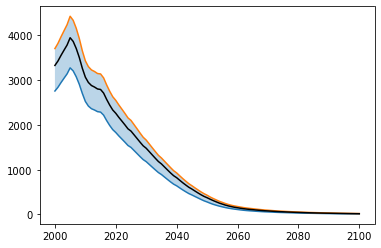

In [32]:
fig, ax = plt.subplots()
plt.plot(list(range(2000,2101)), lwr, label = '20 percentile')
plt.plot(list(range(2000,2101)), hgr, label = '80 percentile')
ax.fill_between(list(range(2000,2101)), lwr, hgr, alpha = 0.3)
plt.plot(np.arange(2000,2101), df[(df.age == age)]['dalys'],color = 'black',linewidth=1.5)